# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [179]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress


mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')


merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [157]:
print(merged_df['Mouse ID'].nunique())

249


In [158]:
duplicate_rows = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_id = duplicate_rows['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [159]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_df[merged_df['Mouse ID'] == duplicate_mice_id[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [160]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mice_id)]
print(clean_df['Mouse ID'].nunique())



248


## Summary Statistics

In [161]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumer Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev', 'Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumer Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [162]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_adv = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_adv.columns = ['Mean (mm3)', 'Median (mm3)', 'Variance (mm3)', 'Std. Dev (mm3)', 'Std. Err. (mm3)']
summary_stats_adv

,Mean (mm3),Median (mm3),Variance (mm3),Std. Dev (mm3),Std. Err. (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

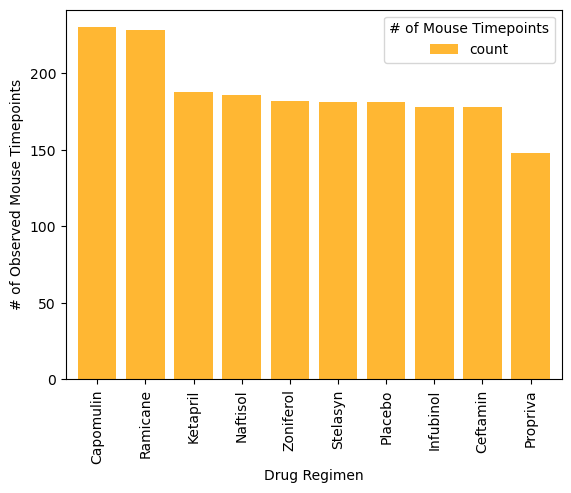

In [163]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_plot_data = clean_df['Drug Regimen'].value_counts().sort_values(ascending=False)
bar_plot_data

drug_regimen_df = pd.DataFrame(bar_plot_data)

ax = drug_regimen_df.plot.bar(xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', width=0.8, color='orange', alpha=0.8)

ax.legend(title='# of Mouse Timepoints')
plt.show()


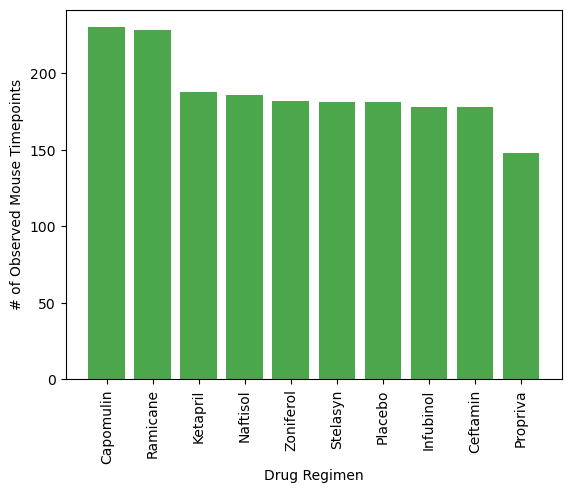

In [164]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_plot_data.index, bar_plot_data.values, color='green', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

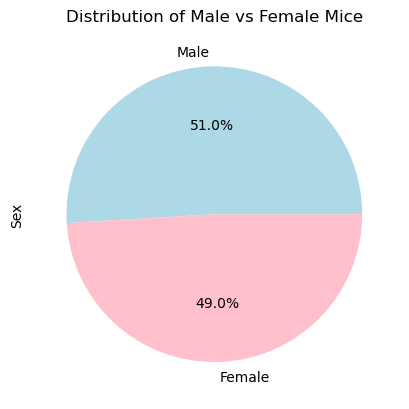

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = clean_df['Sex'].value_counts()

gender_dist.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'], title='Distribution of Male vs Female Mice')
plt.ylabel('Sex')
plt.show()

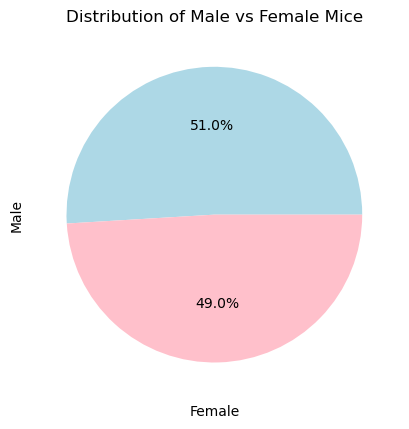

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_dist, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Distribution of Male vs Female Mice')
plt.xlabel('Female')
plt.ylabel('Male')
plt.show()

## Quartiles, Outliers and Boxplots

In [167]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

select_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_data = clean_df[clean_df['Drug Regimen'].isin(select_regimens)]

last_timepoint = final_tumor_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint).reset_index()

final_tumor_volume = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


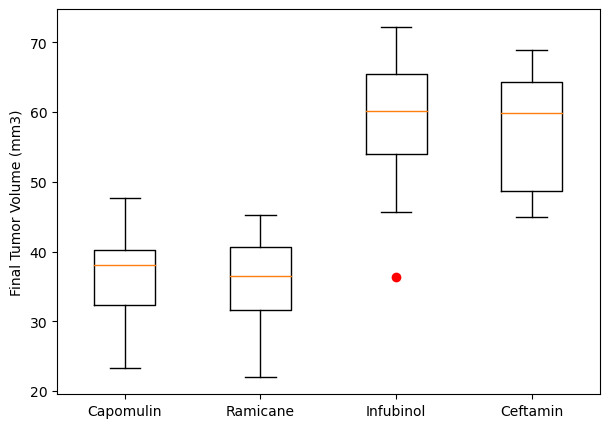

In [168]:
tumor_data = []

for regimen in select_regimens:
    tumor_vol_row = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    tumor_data.append(tumor_vol_row)

plt.figure(figsize=(7,5))
plt.boxplot(tumor_data, labels=select_regimens, sym='ro')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

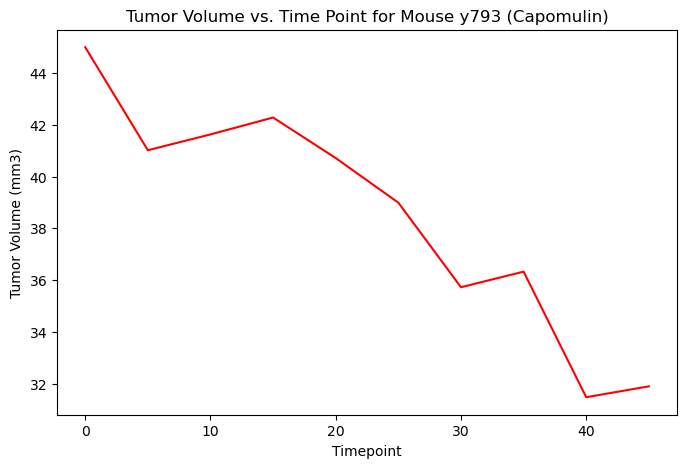

In [169]:
selected_mouse = 'y793' 

capomulin_data = clean_df[(clean_df['Mouse ID'] == selected_mouse) & (clean_df['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(8, 5))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'],  linestyle='-', color='red')

plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

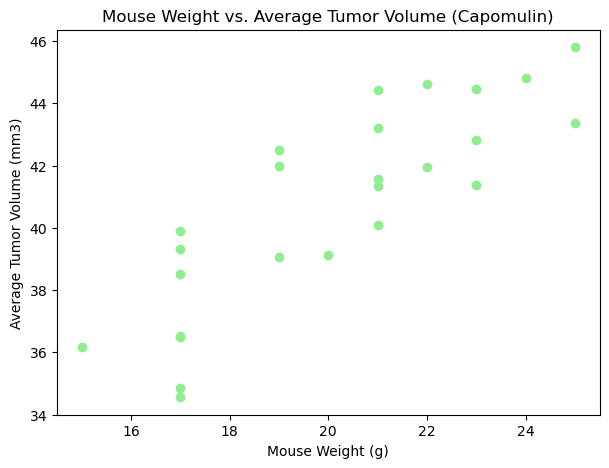

In [174]:
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(average_tumor_vol, mouse_metadata, on='Mouse ID', how='inner')

plt.figure(figsize=(7, 5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='lightgreen')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

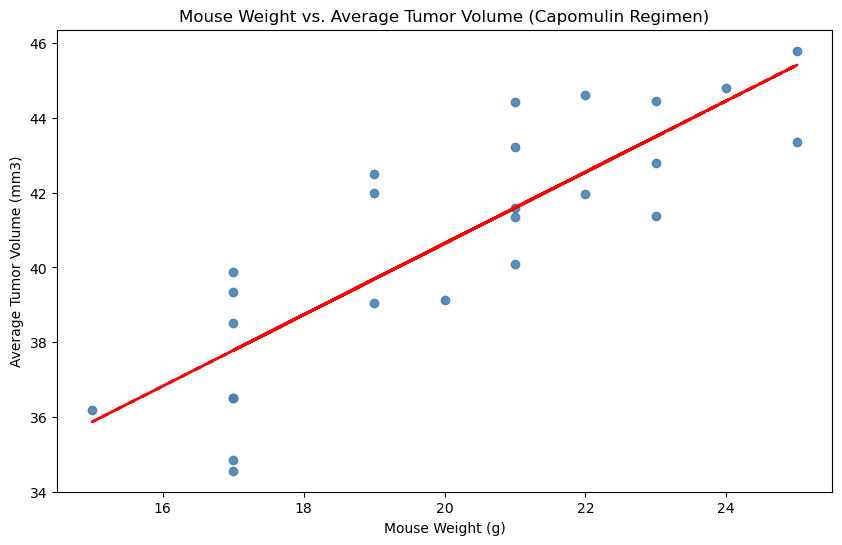

In [180]:
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='steelblue', alpha=0.9)

regress_values = merged_data['Weight (g)'] * slope + intercept
plt.plot(merged_data['Weight (g)'], regress_values, color='r', linestyle='--', linewidth=2)

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [183]:
print(f"Correlation Coefficient: {correlation_coefficient} | Linear Regression Model: y = {slope:.3f}x + {intercept:.3f}")

Correlation Coefficient: 0.8419363424694722 | Linear Regression Model: y = 0.954x + 21.552
